<a href="https://colab.research.google.com/github/Dulajboy/CRM_CW/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**

In [ ]:
!pip install yahoofinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38618 sha256=bcee6e602ac6a073caeb14f8f41caf9bfe250d952d26c6c42969d9c8c9e2bf77
  Stored in directory: /root/.cache/pip/wheels/b0/e1/ca/e683b02e57db550881c8ebb89ba3eccb7a5c0ebfad7f03acea
Successfully built yahoofinancials


In [ ]:
import pandas as pd
import requests

# URL of the S&P 500 companies list on Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Add a User-Agent header to simulate a browser request
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

# Send a GET request to retrieve the HTML content from the URL with the custom header
response = requests.get(url, headers=headers)

# Extract all tables from the HTML content of the response
tables = pd.read_html(response.text)

# The S&P 500 table is the second table in the list (index 1)
sp500_table = tables[1]

# Extract and clean the 'Symbol' column to get the ticker symbols (replace periods with hyphens)
tickers = sp500_table["Symbol"].str.replace('.', '-', regex=False).tolist()

# Display the first 10 tickers for preview
tickers[:10]

/tmp/ipython-input-3360663187.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [ ]:
import yfinance as yf
from datetime import datetime

# Define the start and end dates for the data retrieval period
start_date = '2022-01-01'
end_date = '2025-01-01'

#  Download historical data for all tickers and organize it by ticker symbol
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', auto_adjust=False)

# This will show the shape (dimensions) of the dataset and display the first few rows
print("Data shape:", data.shape)
data.head()


[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['SOLS', 'Q']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')


Data shape: (753, 3018)


Ticker             XYL                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2022-01-03  120.209999  121.050003  116.150002  116.889999  111.648544   
2022-01-04  115.889999  118.730003  115.449997  118.129997  112.832947   
2022-01-05  118.360001  119.570000  116.419998  116.519997  111.295128   
2022-01-06  116.970001  117.690002  115.940002  116.360001  111.142334   
2022-01-07  115.980003  116.709999  115.290001  115.430000  110.254005   

Ticker                      UNH                                      ...  \
Price        Volume        Open        High         Low       Close  ...   
Date                                                                 ...   
2022-01-03   759100  500.000000  502.899994  493.049988  502.279999  ...   
2022-01-04   925400  503.200012  503.750000  490.880005  490.899994  ...   
2022-01-05  1090200  494.769989  497.000000  489.690002  489.690002  ...   
2022-01-06   703400  480.000000  484.140015  463.119995  469.649994  ...   
2022-01-07   765000  467.690002  467.970001  455.549988  458.600006  ...   

Ticker            EIX                                       POOL              \
Price             Low      Close  Adj Close   Volume        Open        High   
Date                                                                           
2022-01-03  66.550003  67.510002  56.610428  1579400  566.000000  566.000000   
2022-01-04  66.599998  66.669998  55.906040  2403900  552.140015  555.640015   
2022-01-05  65.099998  65.199997  54.673374  3346000  546.030029  551.760010   
2022-01-06  64.449997  64.620003  54.187019  2482700  524.419983  532.760010   
2022-01-07  63.880001  65.000000  54.505669  3703200  517.820007  519.469971   

Ticker                                                  
Price              Low       Close   Adj Close  Volume  
Date                                                    
2022-01-03  540.239990  550.250000  522.571045  286000  
2022-01-04  546.809998  549.890015  522.229248  200800  
2022-01-05  528.210022  529.380005  502.750946  278400  
2022-01-06  510.760010  520.520020  494.336609  280900  
2022-01-07  502.190002  503.170013  477.859375  316000  

[5 rows x 3018 columns]

In [ ]:
# Step 3: Data cleaning

# Extract 'Close' prices
close_prices = data.xs('Close', level='Price', axis=1)

# Remove tickers with more than 20% missing data
threshold = 0.8 * len(close_prices)
clean_data = close_prices.dropna(axis=1, thresh=threshold)

# Fill small remaining gaps (optional)
clean_data = clean_data.fillna(method='ffill').fillna(method='bfill')

# Confirm cleaned data
print("After cleaning:", clean_data.shape)
# The original 'tickers' list might still contain the problematic tickers from the initial scrape.
# To accurately report removed tickers based on missing data after the initial download,
# we should compare the columns in the cleaned data to the columns of the initial close_prices.
print("Removed tickers due to missing data:", len(close_prices.columns) - clean_data.shape[1])

After cleaning: (753, 496)
Removed tickers due to missing data: 7


/tmp/ipython-input-2627996594.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clean_data = clean_data.fillna(method='ffill').fillna(method='bfill')


Task 2

In [ ]:
import numpy as np
import pandas as pd

# Assume 'clean_data' is your cleaned daily close prices DataFrame (from Step 1)
# Each column = stock ticker, each row = date

# Step 1: Calculate daily returns for each stock
daily_returns = clean_data.pct_change().dropna()

daily_returns.head()


Ticker,XYL,UNH,FIS,BALL,VRTX,ADSK,ETR,HON,MSCI,HBAN,...,ELV,NFLX,CINF,WYNN,EOG,AOS,COR,EXE,EIX,POOL
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,0.010608,-0.022657,0.005532,-0.034849,-0.003011,-0.019491,-0.001077,0.010638,-0.007472,0.037975,...,-0.014391,-0.010412,0.023252,-0.003190,0.045963,0.016633,-0.009501,0.003456,-0.012443,-0.000654
2022-01-05,-0.013629,-0.002465,0.017640,0.015665,-0.001983,-0.049858,0.002336,0.009856,-0.042309,0.001220,...,0.000109,-0.039973,-0.014083,-0.037033,-0.018353,-0.016714,0.008678,-0.023809,-0.022049,-0.037298
2022-01-06,-0.001373,-0.040924,0.001030,0.001531,0.001039,-0.000795,-0.016945,-0.001137,-0.005547,0.037150,...,-0.040963,-0.025074,0.018491,0.004629,0.020513,0.006703,-0.015472,0.023777,-0.008896,-0.016737
2022-01-07,-0.007992,-0.023528,0.008487,-0.011468,0.000902,-0.006777,0.022617,0.023385,-0.019503,0.011157,...,-0.010149,-0.022104,0.020823,-0.001063,0.027638,-0.011296,0.020468,0.038358,0.005880,-0.033332
2022-01-10,-0.010136,0.013956,-0.010796,-0.006298,0.009511,0.000267,-0.003835,-0.010614,-0.018370,-0.011034,...,0.006529,-0.002236,-0.003287,-0.028149,-0.001019,-0.003127,0.011418,0.012987,0.009846,-0.013634


In [ ]:


# Get S&P 500 index data (market benchmark)
market_data = yf.download('^GSPC', start='2022-01-01', end='2025-01-01')
# Calculate the correlation between the stock and the market returns
market_returns = market_data['Close'].pct_change().dropna()

# Calculate beta for each stock
beta_values = {}

# Loop through each stock in the daily_returns DataFrame to calculate Beta
for ticker in daily_returns.columns:
    stock_returns = daily_returns[ticker].dropna()

    # Align dates with market data
    aligned = pd.concat([stock_returns, market_returns], axis=1).dropna()
    stock_r, market_r = aligned.iloc[:, 0], aligned.iloc[:, 1]

    corr = stock_r.corr(market_r)
    stock_std = stock_r.std()
    market_std = market_r.std()

    beta = corr * (stock_std / market_std)
    beta_values[ticker] = beta

# Create DataFrame
beta_df = pd.DataFrame(list(beta_values.items()), columns=['Ticker', 'Beta'])
beta_df.sort_values(by='Beta', ascending=False).head(10)

/tmp/ipython-input-3638984069.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market_data = yf.download('^GSPC', start='2022-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


,Ticker,Beta
318,COIN,2.960959
30,XYZ,2.544784
84,NVDA,2.268392
104,APP,2.261933
456,TTD,2.237123
323,PLTR,2.189588
143,MPWR,2.133868
459,AMD,2.064749
483,DASH,2.004918
402,HOOD,1.984828


In [ ]:
# Step 4: Calculate annual volatility
daily_volatility = daily_returns.std()
annual_volatility = daily_volatility * np.sqrt(252)

# Create volatility DataFrame
volatility_df = pd.DataFrame({
    'Ticker': daily_returns.columns,
    'Daily Volatility': daily_volatility.values,
    'Annual Volatility': annual_volatility.values
})

volatility_df.sort_values(by='Annual Volatility', ascending=False).head(10)

,Ticker,Daily Volatility,Annual Volatility
318,COIN,0.060087,0.953848
69,SMCI,0.056818,0.901957
104,APP,0.049663,0.788374
323,PLTR,0.043525,0.690932
30,XYZ,0.041187,0.653825
402,HOOD,0.041057,0.651759
456,TTD,0.040799,0.647665
147,TSLA,0.038618,0.613038
184,MRNA,0.038024,0.603608
435,EPAM,0.037945,0.602363


Task 3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [ ]:
# Reconstruct metrics_df using only beta_df
metrics_df = beta_df

# Select the correct column for X (Beta only)
X = metrics_df[['Beta']]

# Standardize the Beta values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



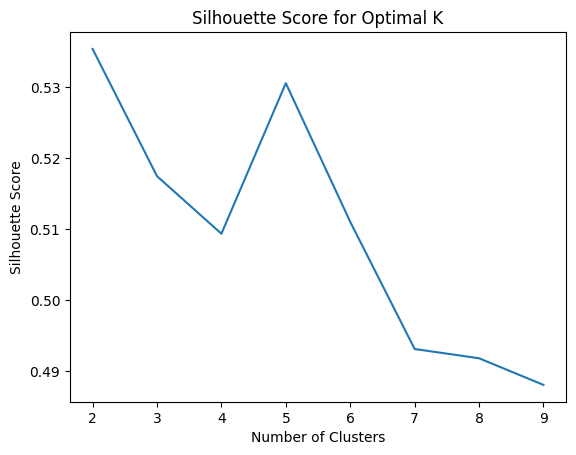

In [ ]:
import scipy.cluster.hierarchy as sch
# Initialize an empty list to store silhouette scores for each number of clusters
silhouette_scores = []
# Define the range of K values (number of clusters) to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
#Loop through each k value (number of clusters) to evaluate
for n_clusters in range_n_clusters:
    agglom = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglom.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for different K values
plt.plot(range_n_clusters, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

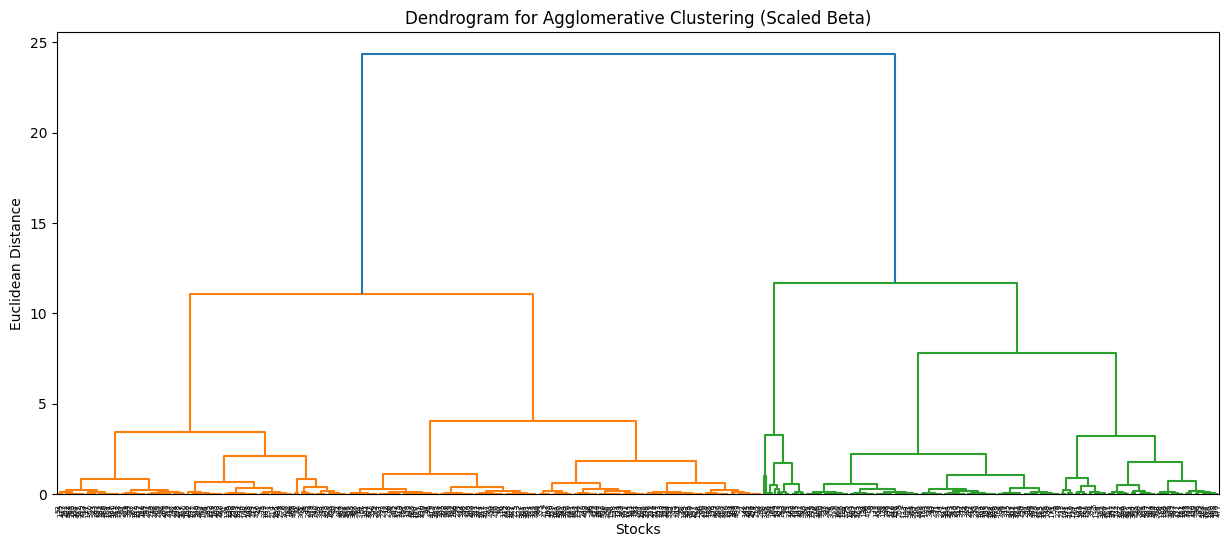

In [ ]:
#set the figure size for the dendrogram plot
plt.figure(figsize=(15, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled[:, 0].reshape(-1, 1), method='ward'))
#below code use define title ,x-axis,y-axis
plt.title("Dendrogram for Agglomerative Clustering (Scaled Beta)")
plt.xlabel("Stocks")
plt.ylabel("Euclidean Distance")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Assuming 'X_scaled' is already defined (beta only)
optimal_n_clusters = 3

# Perform Agglomerative Clustering with K=3 (as identified using silhouette score and dendrogram)
agg = AgglomerativeClustering(n_clusters=optimal_n_clusters, metric='euclidean', linkage='ward')
cluster_labels = agg.fit_predict(X_scaled)  # Get cluster labels

# Create a new DataFrame for the result with correct column names for both scaled features
clustered_data = pd.DataFrame(X_scaled, columns=['Beta'])
clustered_data['Cluster'] = cluster_labels  # Add cluster labels

# Display the first few rows of the new DataFrame with cluster labels
print(clustered_data.head())

       Beta  Cluster
0  0.324365        1
1 -1.182257        0
2  0.200027        1
3 -0.056868        0
4 -0.703140        0


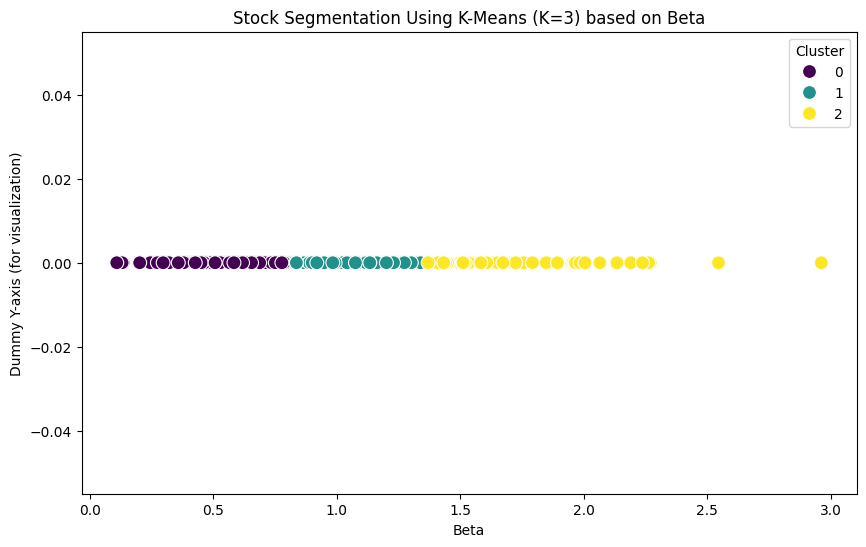

Cluster Profiles Based on Beta:
             mean       std
Cluster                    
0        0.543281  0.161112
1        1.034731  0.148020
2        1.695954  0.307049


In [ ]:


# Step 2: Apply K-Means clustering with the optimal number of clusters (K=3 in this case)
from sklearn.cluster import KMeans

optimal_n_clusters = 3  # This value was determined earlier using Elbow and Silhouette methods
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
metrics_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Visualize the clusters (Only using Beta for the x-axis)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Beta', y=[0] * len(metrics_df), hue='Cluster', data=metrics_df, palette='viridis', s=100)
plt.title(f'Stock Segmentation Using K-Means (K={optimal_n_clusters}) based on Beta')
plt.xlabel('Beta')
plt.ylabel('Dummy Y-axis (for visualization)')
plt.legend(title='Cluster')
plt.show()

# Step 4: Cluster profiling - Calculate mean and standard deviation for Beta for each cluster
cluster_profiles = metrics_df.groupby('Cluster')['Beta'].agg(['mean', 'std'])
print("Cluster Profiles Based on Beta:")
print(cluster_profiles)


Task 4

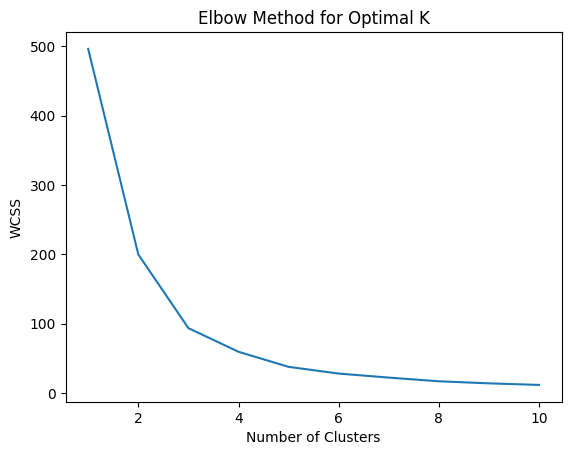

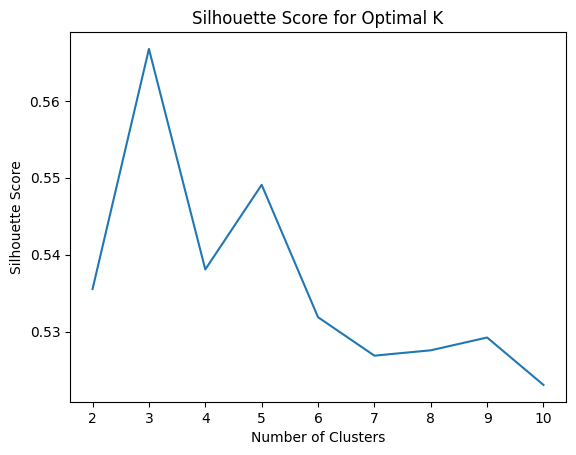

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for k in range(1, 11):  # Testing K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') # Added n_init to suppress warning
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

sil_scores = []
for k in range(2, 11):  # Silhouette score requires K ≥ 2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') # Added n_init to suppress warning
    kmeans.fit(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()




# Optimal K is chosen based on both methods. For example, if K=3 gives the highest silhouette score, that would be the ideal choice.

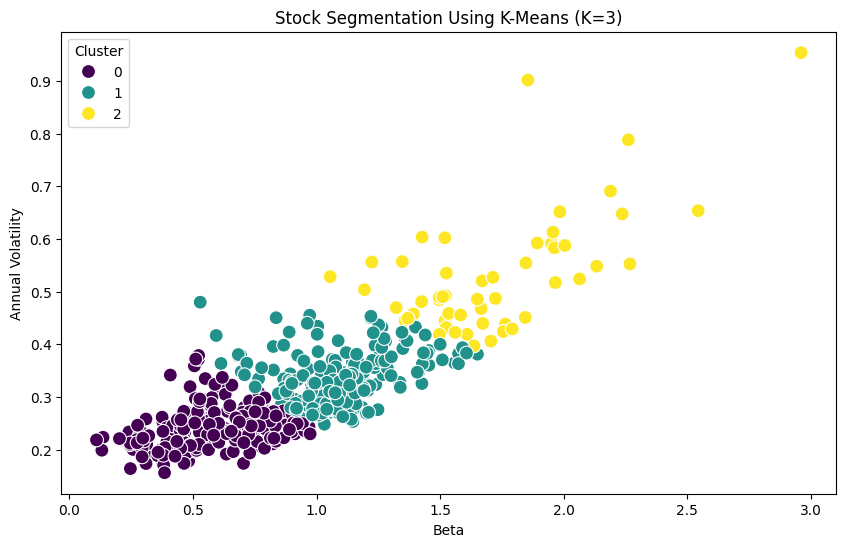

Cluster Profiles Based on Beta and Annual Volatility:
             Beta           Annual Volatility          
             mean       std              mean       std
Cluster                                                
0        0.602939  0.198262          0.240433  0.037635
1        1.087293  0.199200          0.331994  0.050465
2        1.724987  0.352989          0.531256  0.114632


In [ ]:

import seaborn as sns

# Step 1: Load and preprocess the data (Beta and Annual Volatility)
# Reconstruct metrics_df by merging beta_df and volatility_df
metrics_df = pd.merge(beta_df, volatility_df, on='Ticker')

# Assume metrics_df has columns 'Beta' and 'Annual Volatility'
scaler = StandardScaler()
X_scaled = scaler.fit_transform(metrics_df[['Beta', 'Annual Volatility']])

#Apply K-Means clustering with the optimal number of clusters (K=3 in this case)
optimal_n_clusters = 3  # This value was determined earlier using Elbow and Silhouette methods
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init='auto')
metrics_df['Cluster'] = kmeans.fit_predict(X_scaled)

#  Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Beta', y='Annual Volatility', hue='Cluster', data=metrics_df, palette='viridis', s=100)
plt.title(f'Stock Segmentation Using K-Means (K={optimal_n_clusters})')
plt.xlabel('Beta')
plt.ylabel('Annual Volatility')
plt.legend(title='Cluster')
plt.show()

# Cluster profiling - Calculate mean and standard deviation for Beta and Annual Volatility for each cluster
cluster_profiles = metrics_df.groupby('Cluster')[['Beta', 'Annual Volatility']].agg(['mean', 'std'])
print("Cluster Profiles Based on Beta and Annual Volatility:")
print(cluster_profiles)


Task **5**

In [ ]:
# Cluster summary table (Beta & Volatility statistics)
cluster_summary = metrics_df.groupby('Cluster')[['Beta', 'Annual Volatility']].agg(['mean','std','min','max','count'])

print("Cluster Summary:")
print(cluster_summary.to_string())

Cluster Summary:
             Beta                                     Annual Volatility                                    
             mean       std       min       max count              mean       std       min       max count
Cluster                                                                                                    
0        0.602939  0.198262  0.109437  0.974059   227          0.240433  0.037635  0.156076  0.378766   227
1        1.087293  0.199200  0.529163  1.651205   217          0.331994  0.050465  0.248185  0.480009   217
2        1.724987  0.352989  1.055336  2.960959    52          0.531256  0.114632  0.396983  0.953848    52


In [ ]:
# Compute average daily return for each stock
avg_daily_return = daily_returns.mean()

# The rename method converts the Series to a DataFrame column for merging
metrics_df = pd.merge(metrics_df, avg_daily_return.rename('Avg_Daily_Return'), on='Ticker', how='left')

# Compute cluster-level averages using the correct 'Cluster' column from metrics_df
daily_ret_cluster = metrics_df.groupby('Cluster')['Avg_Daily_Return'].mean()

print("\nAverage Daily Return per Cluster:")
print(daily_ret_cluster.to_string())


Average Daily Return per Cluster:
Cluster
0    0.000234
1    0.000357
2    0.000667


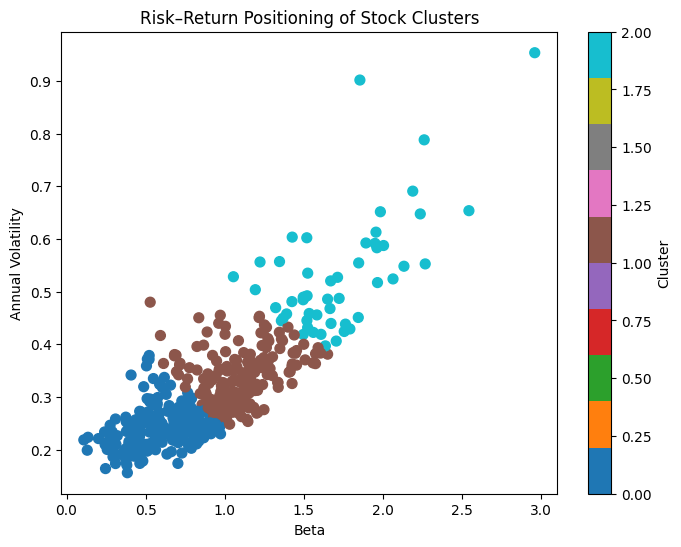

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(metrics_df['Beta'], metrics_df['Annual Volatility'],
            c=metrics_df['Cluster'], cmap='tab10', s=50)

plt.xlabel("Beta")
plt.ylabel("Annual Volatility")
plt.title("Risk–Return Positioning of Stock Clusters")
plt.colorbar(label='Cluster')
plt.show()